In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Cm
from docx.enum.table import WD_TABLE_DIRECTION
from docx.enum.table import WD_ROW_HEIGHT_RULE

In [2]:
variables = ['iso_code','location','date','total_vaccinations','total_vaccinations_per_hundred']
b_vacuna = pd.read_csv('https://covid.ourworldindata.org/data/vaccinations/vaccinations.csv', usecols=variables)
b_vacuna['date'] = pd.to_datetime(b_vacuna['date'])
b_vacuna

,location,iso_code,date,total_vaccinations,total_vaccinations_per_hundred
0,Albania,ALB,2021-01-10,0.0,0.00
1,Albania,ALB,2021-01-11,NaN,NaN
2,Albania,ALB,2021-01-12,128.0,0.00
3,Albania,ALB,2021-01-13,188.0,0.01
4,Albania,ALB,2021-01-14,266.0,0.01
...,...,...,...,...,...
5981,Zimbabwe,ZWE,2021-03-06,32014.0,0.22
5982,Zimbabwe,ZWE,2021-03-07,32240.0,0.22
5983,Zimbabwe,ZWE,2021-03-08,35518.0,0.24
5984,Zimbabwe,ZWE,2021-03-09,35761.0,0.24


### Última fecha en la base:

In [3]:
b_vacuna.date.max()

Timestamp('2021-03-10 00:00:00')

### Los datos de varios países no son diarios, por lo que faltan los datos de varias fechas

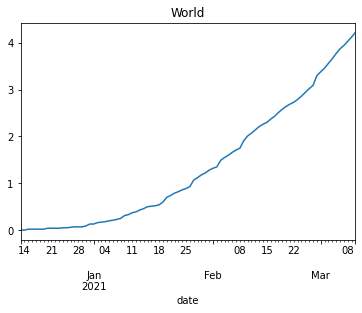

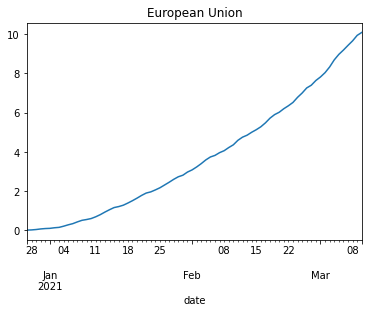

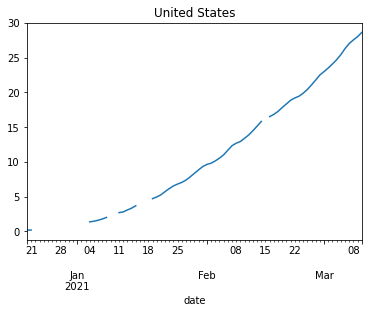

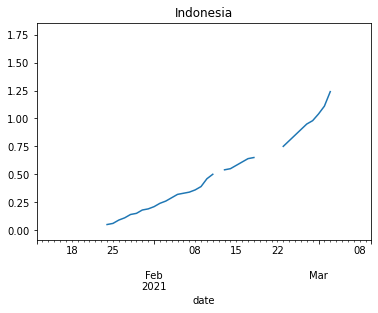

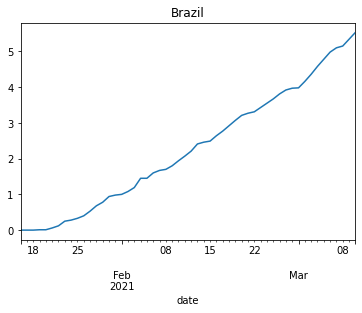

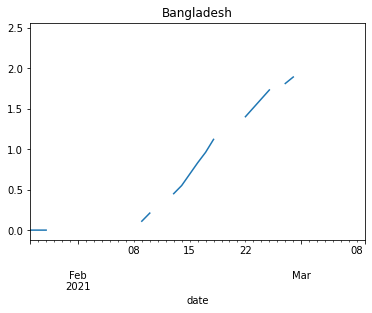

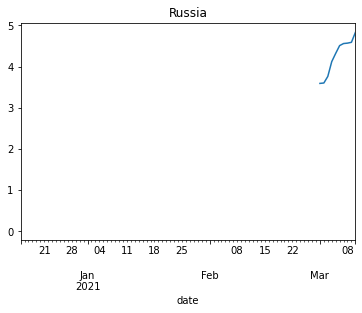

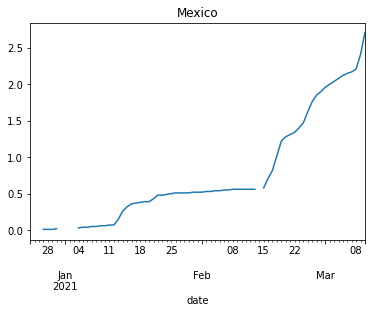

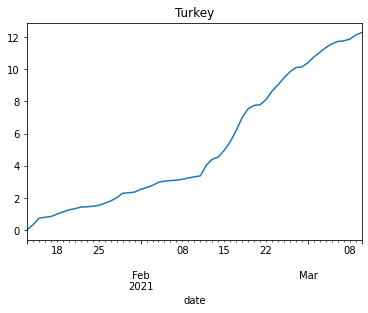

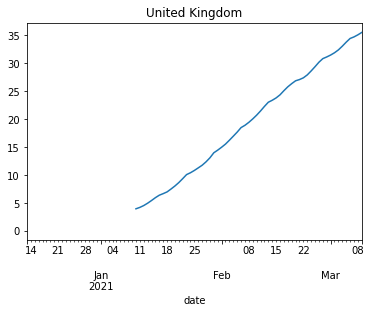

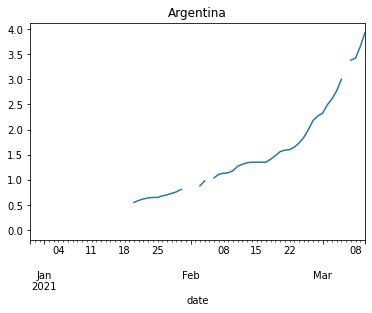

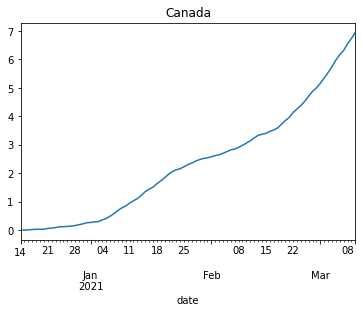

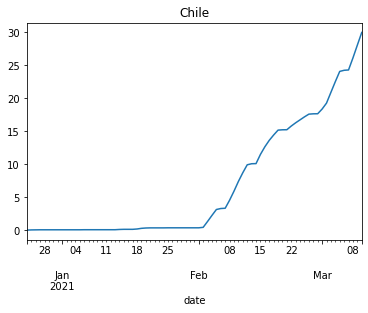

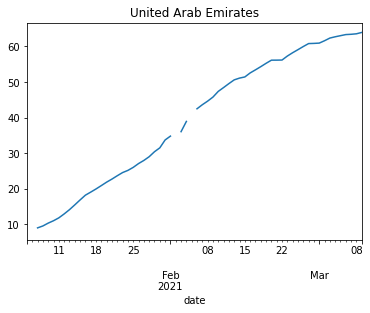

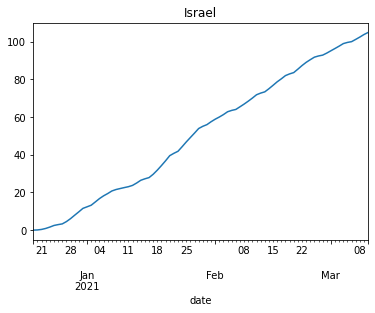

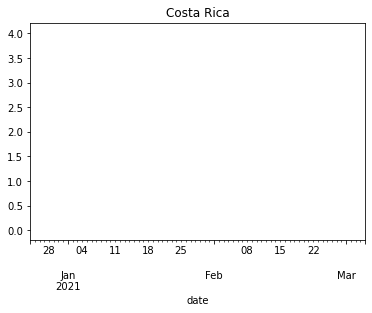

In [4]:
paises = ['World','European Union','United States','Indonesia','Brazil','Bangladesh','Russia','Mexico','Turkey',
          'United Kingdom','Argentina','Canada','Chile','United Arab Emirates','Israel','Costa Rica']
for pais in paises:
    b_vacuna[b_vacuna['location']==pais].set_index('date')['total_vaccinations_per_hundred'].plot()
    plt.title(pais)
    plt.show()

### Estimo los datos faltantes con una interpolación

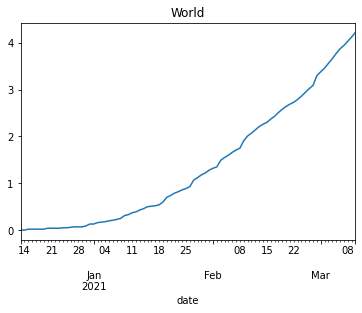

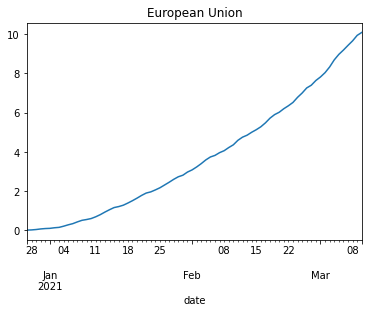

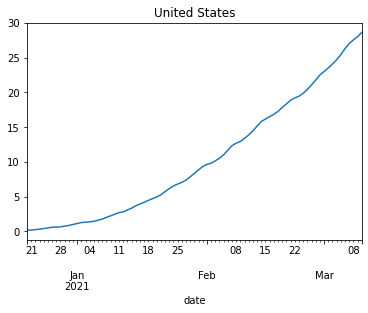

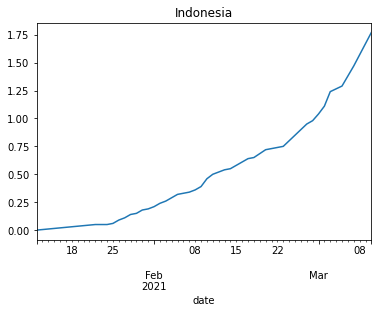

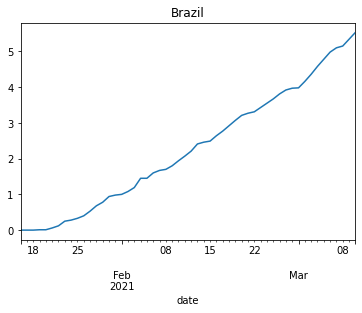

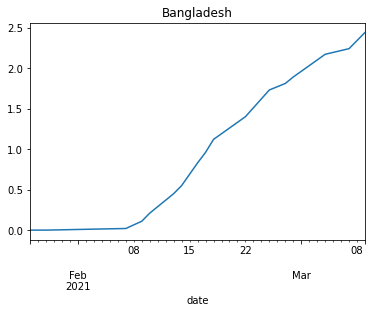

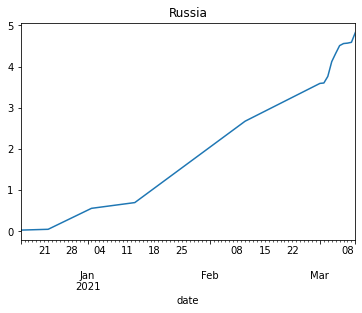

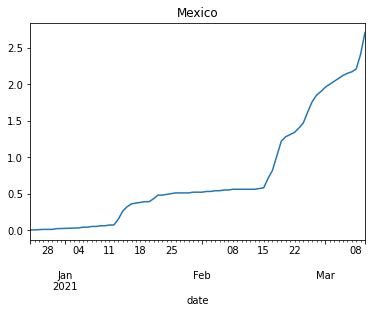

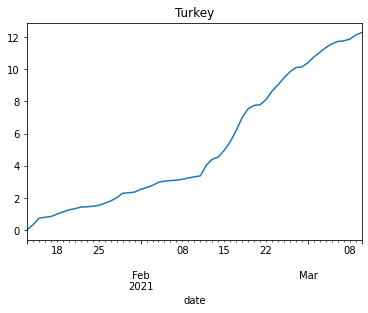

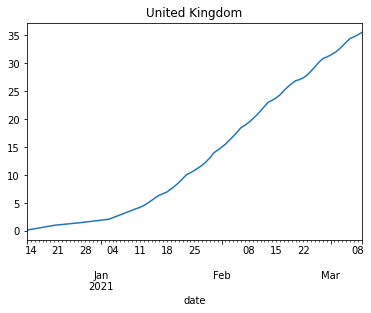

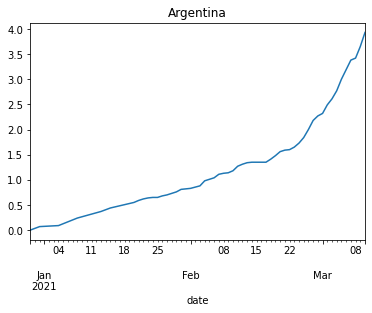

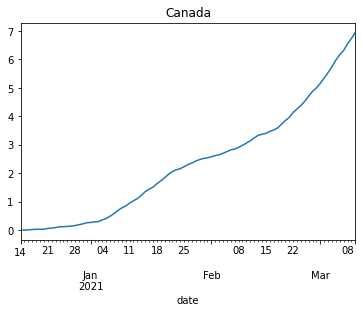

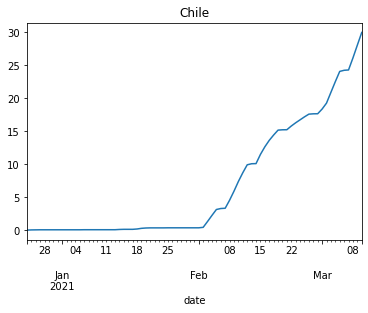

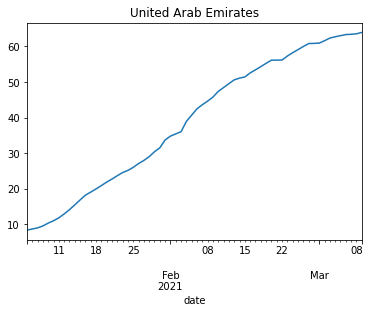

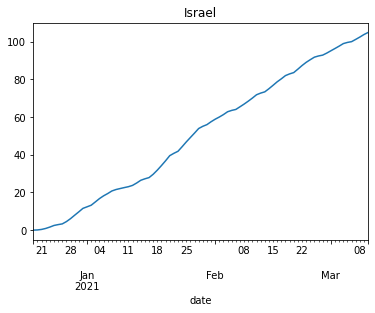

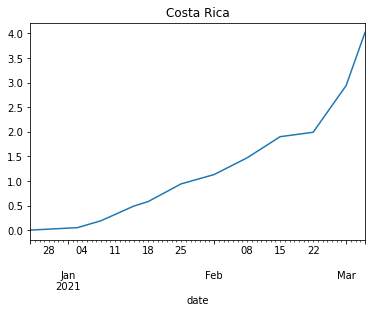

In [5]:
for pais in paises:
    b_vacuna[b_vacuna['location']==pais].set_index('date')['total_vaccinations_per_hundred'].interpolate().plot()
    plt.title(pais)
    plt.show()

In [6]:
paises = ['World','European Union','United States','Indonesia','Brazil','Russia','Mexico','Turkey',
          'United Kingdom','Argentina','Canada','Chile','United Arab Emirates','Israel','Costa Rica']
vacunas_100 = []
vacunas_antes = []
personas = []
personas_antes = []
last_date = []
for pais in paises:
    value = b_vacuna[b_vacuna['location']==pais].interpolate().iloc[-1,-1]
    value1 =  b_vacuna[b_vacuna['location']==pais].interpolate().iloc[-8,-1]
    people = round(b_vacuna[b_vacuna['location']==pais].interpolate().iloc[-1,-2])
    people1 = round(b_vacuna[b_vacuna['location']==pais].interpolate().iloc[-8,-2])
    last = str(b_vacuna[b_vacuna['location']==pais].dropna().iloc[-1,-3])[:10]
    last_date.append(last)
    personas.append(people)
    personas_antes.append(people1)
    vacunas_100.append(value)
    vacunas_antes.append(round(value1,2))


### Cuadro ordenado por personas vacunadas por cada 100 habs, utiliza los datos estimados por interpolación

In [7]:
base_100_interes = pd.DataFrame({'País/Región': paises,
                                 'Dosis aplicadas hace una semana (Total)': personas_antes,
                                 'Dosis aplicadas (Total)': personas,
                                 'Dosis aplicadas por cada 100 habs. hace una semana': vacunas_antes,
                                 'Dosis aplicadas por cada 100 habs.': vacunas_100,
                                 'Última fecha reportada': last_date
                                }).sort_values('Dosis aplicadas por cada 100 habs.', ascending=False)
base_100_interes = base_100_interes.set_index('País/Región').rename(index = {'United Arab Emirates': 'Emiratos Árabes Unidos',
                                                         'United Kingdom': 'Reino Unido',
                                                         'United States': 'Estados Unidos',
                                                         'Turkey': 'Turquía', 'European Union': 'Unión Europea',
                                                         'Canada':'Canadá', 'Brazil': 'Brasil', 'Russia': 'Rusia',
                                                         'World': 'Mundial', 'Mexico':'México'}).reset_index()
base_100_interes

,País/Región,Dosis aplicadas hace una semana (Total),Dosis aplicadas (Total),Dosis aplicadas por cada 100 habs. hace una semana,Dosis aplicadas por cada 100 habs.,Última fecha reportada
0,Israel,8444971,9072077,97.57,104.81,2021-03-10
1,Emiratos Árabes Unidos,6094956,6325211,61.62,63.95,2021-03-09
2,Reino Unido,21599027,24064182,31.82,35.45,2021-03-09
3,Chile,3987211,5722212,20.86,29.93,2021-03-10
4,Estados Unidos,80540474,95721290,24.08,28.62,2021-03-10
5,Turquía,9317546,10360283,11.05,12.28,2021-03-10
6,Unión Europea,37083631,44908519,8.33,10.09,2021-03-10
7,Canadá,2091700,2621289,5.54,6.95,2021-03-10
8,Brasil,9277322,11756131,4.36,5.53,2021-03-10
9,Rusia,5489342,7048129,3.76,4.83,2021-03-10


### Cuadro de ocupación hospitalaria en las últimas dos semanas

In [8]:
ocupacion2 = pd.read_excel('C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/MIAS/BaseOcupacionHospitalaria_210305.xlsx', skiprows=4, index_col=0)
ocupacion2 = ocupacion2[ocupacion2.columns[-2:]]
fechas_date = list(ocupacion2.columns)
fechas_str = [str(x)[:10] for x in list(ocupacion2.columns)]
ocupacion2.rename(columns = {fechas_date[0]:fechas_str[0],fechas_date[1]:fechas_str[1]},inplace=True)
ocupacion2['Diferencia'] = ocupacion2.iloc[:,1] - ocupacion2.iloc[:,0]
ocupacion2 = round(ocupacion2*100)
ocupacion2

,2021-02-26,2021-03-05,Diferencia
ESTADO,,,
Aguascalientes,22.0,24.0,2.0
Baja California,10.0,8.0,-2.0
Baja California Sur,18.0,19.0,1.0
Campeche,4.0,5.0,1.0
Coahuila,10.0,10.0,0.0
Colima,24.0,20.0,-4.0
Chiapas,8.0,5.0,-3.0
Chihuahua,15.0,14.0,-1.0
Ciudad de México,56.0,52.0,-4.0


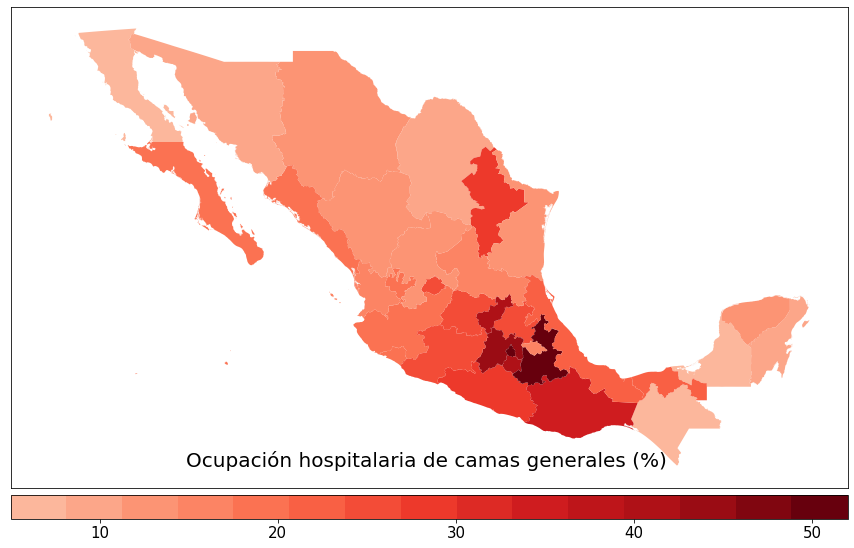

In [9]:
path3 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/mapa/'

import geopandas as gpd
import matplotlib.pyplot as plt 

#Definimos el mapa (queda como geoDataFrame) y el csv que utilizaremos

shapefile = path3+'Mexico_Polygon.shp' #https://www.igismap.com/download-mexico-shapefile-free-boundary-line-polygon/
#datafile = 'data/obesity.csv'

gdf = gpd.read_file(shapefile)[['name','geometry']] #[['geometry']]
gdf.columns = ['ENTIDAD', 'geometry']
ocupacion = ocupacion2.copy().rename(index = {'México':'Mexico','Ciudad de México':'Mexico City','San Luis Potosí':'San Luis Potosi'})
ocupacion = gdf.set_index('ENTIDAD').join(ocupacion)

#----------------------------------------------------------------------------------------------------------------------

from mpl_toolkits.axes_grid1 import make_axes_locatable 
# import mapclassify 
fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

import matplotlib as mpl
cmap = mpl.cm.Reds(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])
cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)
ocupacion.plot(column = ocupacion.columns[-2], ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Ocupación hospitalaria de camas generales (%) \n',fontsize=20)
plt.savefig('mapa_ocupacion.png', bbox_inches='tight')
plt.show()


## Hacer el documento

In [10]:
for i in range(ocupacion2.shape[0]):
    for j in range(ocupacion2.shape[1]):
        ocupacion2.iloc[i,j] = str(ocupacion2.iloc[i,j])+' %'
ocupacion2.reset_index(inplace=True)
ocupacion2

,ESTADO,2021-02-26,2021-03-05,Diferencia
0,Aguascalientes,22.0 %,24.0 %,2.0 %
1,Baja California,10.0 %,8.0 %,-2.0 %
2,Baja California Sur,18.0 %,19.0 %,1.0 %
3,Campeche,4.0 %,5.0 %,1.0 %
4,Coahuila,10.0 %,10.0 %,0.0 %
5,Colima,24.0 %,20.0 %,-4.0 %
6,Chiapas,8.0 %,5.0 %,-3.0 %
7,Chihuahua,15.0 %,14.0 %,-1.0 %
8,Ciudad de México,56.0 %,52.0 %,-4.0 %
9,Durango,26.0 %,14.0 %,-12.0 %


In [11]:
reporte = 'CambiosReporte.docx'

In [12]:
document = Document()

document.add_heading('Cambios al reporte',0)

document.add_heading('Vacunación', level=1)

t = document.add_table(base_100_interes.shape[0]+1, base_100_interes.shape[1],style='LightShading-Accent1')

for j in range(base_100_interes.shape[-1]):
    t.cell(0,j).text = base_100_interes.columns[j] #
    
for i in range(base_100_interes.shape[0]):
    for j in range(base_100_interes.shape[-1]):
        t.cell(i+1,j).text = str(base_100_interes.values[i,j])

document.save(reporte)


        


C:\ProgramData\Anaconda3\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


In [13]:
document.add_page_break()

document.add_heading('Ocupación hospitalaria', level=1)

t = document.add_table(ocupacion2.shape[0]+1, ocupacion2.shape[1],style='LightShading-Accent1')

for j in range(ocupacion2.shape[-1]):
    t.cell(0,j).text = ocupacion2.columns[j] #
    
for i in range(ocupacion2.shape[0]):
    for j in range(ocupacion2.shape[-1]):
        t.cell(i+1,j).text = str(ocupacion2.values[i,j])
        
document.add_picture('mapa_ocupacion.png', width=Inches(6))

document.save(reporte)
